<a href="https://colab.research.google.com/github/naksh-atra/Birthrate_Analysis/blob/main/Birthrate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Birthrate Analysis

In [1]:
import pandas as pd
import numpy as np

In [2]:
#importing births dataset from github (using colab)
url = 'https://raw.githubusercontent.com/naksh-atra/Birthrate_Analysis/main/Births.csv'

In [3]:
#loading and checking csv file
births = pd.read_csv(url)
print(births.head())

   year  month  day gender  births
0  1969      1  1.0      F    4046
1  1969      1  1.0      M    4440
2  1969      1  2.0      F    4454
3  1969      1  2.0      M    4548
4  1969      1  3.0      F    4548


In [4]:
#creating a new decade column
births['decade'] = 10 * (births['year']//10)
print(births.head())

   year  month  day gender  births  decade
0  1969      1  1.0      F    4046    1960
1  1969      1  1.0      M    4440    1960
2  1969      1  2.0      F    4454    1960
3  1969      1  2.0      M    4548    1960
4  1969      1  3.0      F    4548    1960


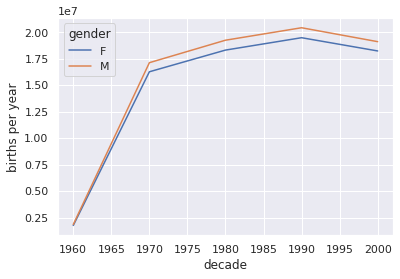

In [5]:
#ANALYSIS 1: Female and Male birth rates each decade and year
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
wrt_decade = births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')
wrt_decade.plot()
plt.ylabel("births per year")
plt.show()

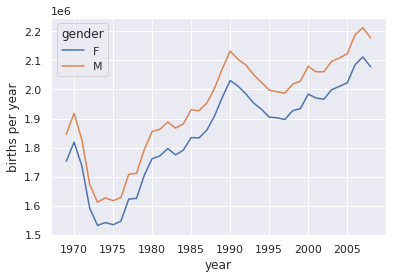

In [6]:
wrt_year = births.pivot_table('births', index='year', columns='gender', aggfunc='sum')
wrt_year.plot()
plt.ylabel("births per year")
plt.show()

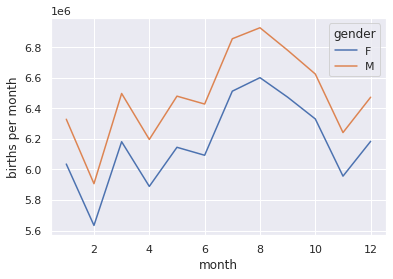

In [7]:
#ANALYSIS 2: Number of births every month
birth_month = births.pivot_table('births', index='month', columns='gender', aggfunc='sum')
birth_month.plot()
plt.ylabel("births per month")
plt.show()

In [8]:
import numpy as np
# Divide births into 4 percentile groups called quartiles
quartiles = np.percentile(births['births'], [25, 50, 75])
mean = quartiles[1]
sigma = 0.74 * (quartiles[2] - quartiles[0]) # 0.74 comes from the interquartile range of a Gaussian distribution.

In [9]:
births = births.query('(births > @mean - 5 * @sigma) & (births < @mean + 5 * @sigma)')
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')
births['day of week'] = births.index.dayofweek

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


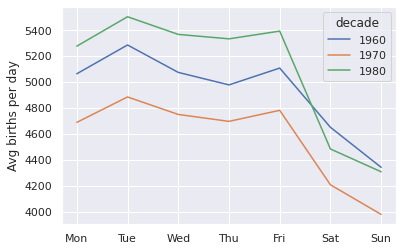

In [10]:
#ANALYSIS 3: Number of births by days in a week between diff decades
birth_day = births.pivot_table('births', index='day of week', columns='decade' , aggfunc='mean')
birth_day.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
birth_day.plot()
plt.ylabel("Avg births per day")
plt.show()

In [11]:
births_month = births.pivot_table('births', [births.index.month, births.index.day])
print(births_month.head())

# births_month.index is in month, day format
births_month.index = [pd.datetime(2008, month, day) for (month, day) in births_month.index]
print(births_month.head())

       births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625
              births
2008-01-01  4009.225
2008-01-02  4247.400
2008-01-03  4500.900
2008-01-04  4571.350
2008-01-05  4603.625


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


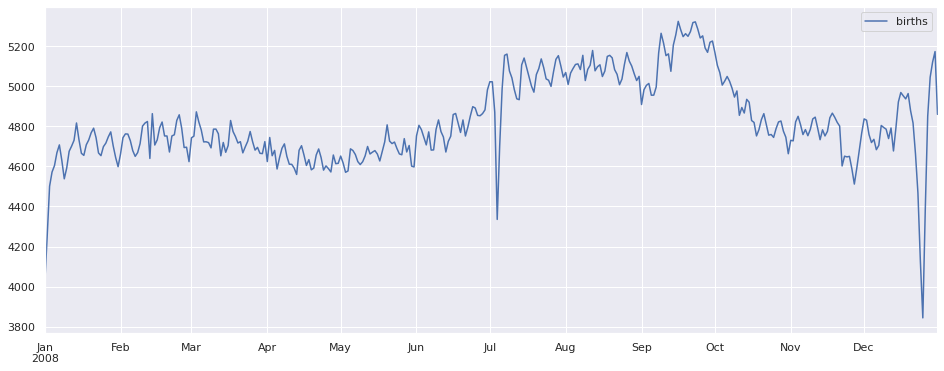

In [12]:
#ANALYSIS 4: Births by each month in a given year (2008)
fig, ax = plt.subplots(figsize=(16, 6)) #(length, breadth)
births_month.plot(ax=ax)
plt.show()